In [1]:
!pip install torchvision matplotlib --quiet
import torch
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = maskrcnn_resnet50_fpn(pretrained=True)
model.to(device).eval()

/Users/rishikesh4089/Desktop/Work/ZIDIO_Task1/venv/lib/python3.13/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/rishikesh4089/Desktop/Work/ZIDIO_Task1/venv/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [3]:
image_path = "../images/im1.jpg"  # Replace with your image path
image = Image.open(image_path).convert("RGB")
image_tensor = F.to_tensor(image).unsqueeze(0).to(device)

In [4]:
with torch.no_grad():
    outputs = model(image_tensor)

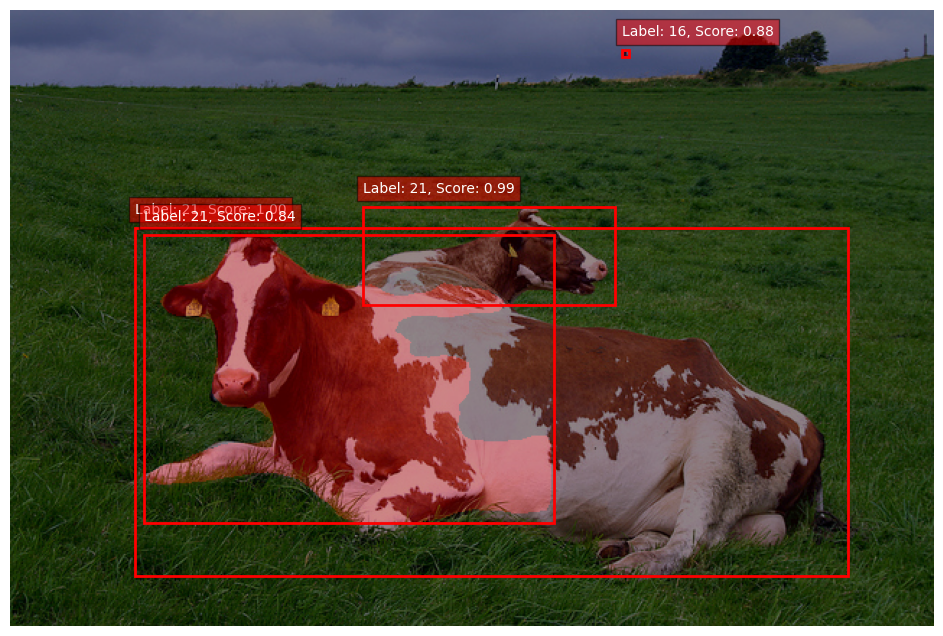

In [5]:
def display_segmentation(image, outputs, threshold=0.5):
    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(image)

    pred_scores = outputs[0]['scores'].detach().cpu().numpy()
    high_score_idxs = np.where(pred_scores > threshold)[0]

    for idx in high_score_idxs:
        box = outputs[0]['boxes'][idx].detach().cpu().numpy()
        label = outputs[0]['labels'][idx].item()
        score = pred_scores[idx]
        mask = outputs[0]['masks'][idx, 0].detach().cpu().numpy()
        mask = (mask > 0.5).astype(np.uint8)

        # Draw bounding box
        rect = patches.Rectangle((box[0], box[1]),
                                 box[2]-box[0],
                                 box[3]-box[1],
                                 linewidth=2,
                                 edgecolor='red',
                                 facecolor='none')
        ax.add_patch(rect)
        ax.text(box[0], box[1] - 10, f"Label: {label}, Score: {score:.2f}",
                color='white', fontsize=10,
                bbox=dict(facecolor='red', alpha=0.5))

        # Apply mask
        colored_mask = np.zeros_like(np.array(image), dtype=np.uint8)
        colored_mask[:, :, 0] = mask * 255
        blended = np.array(image) * 0.5 + colored_mask * 0.5
        ax.imshow(blended.astype(np.uint8), alpha=0.5)

    ax.axis("off")
    plt.show()

display_segmentation(image, outputs)